# EDA

El objetivo de este trabajo es llevar a cabo un análisis exploratorio de los datos contenidos en el archivo `pacientes_cancer.csv`. Para ello, será necesario realizar las siguientes tareas:

1. Entender qué representa cada variable y **eliminar las columnas innecesarias**.
2. **Distinguir entre columnas según el tipo** de variable (numérica, categórica, etc.)
3. Buscar **valores nulos** y **registros duplicados**.
4. Calcular **estadísticos descriptivos**:
    - Variables numéricas: *media*, *mediana*, *moda*, *cuartiles* y valores *máximo* y *mínimo*.
    - Variables categóricas: número de *categorías diferentes*, el valor de las *más y menos frecuentes*, y sus *frecuencias asociadas*.
5. Representar la **distribución** de los datos de la variable (*histograma*).
6. Estudiar la colinealidad entre variables e interpretarla.

Para realizar todas estas tareas, vamos a necesitar los siguientes módulos:

In [127]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Datos

En primer lugar, se cargan los datos y se leen utilizando el método `.head()` sobre el objeto que contiene le data frame para mostrar las primeras filas y así hacernos una idea de los datos que contiene el archivo.

In [128]:
df = pd.read_csv('cancer_gene_expression_dataset.csv') # leer dataset
df.head() # mostrar las primeras filas

,Patient_ID,TP53,BRCA1,BRCA2,EGFR,KRAS,MYC,PTEN,RB1,APC,...,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2,STK11
0,P001,2.621229,2.294844,2.285151,3.162488,2.602772,2.000662,3.604151,3.030050,2.044993,...,0.369233,0.085684,-0.057824,-0.150552,-0.739261,-0.359922,-0.230319,0.528561,0.171809,-0.881520
1,P002,2.644670,2.086924,2.105762,2.326020,3.698626,2.595286,1.770801,2.213316,3.052054,...,0.048539,0.484322,-0.351027,-0.163831,-0.196054,-0.731757,0.148060,0.130528,0.002557,-0.117294
2,P003,1.942043,1.781996,2.277527,1.855014,2.667775,3.023350,2.820747,2.580678,2.965334,...,0.113730,0.653571,-0.803742,0.092317,0.129941,0.390911,-0.618475,-0.660228,0.260971,0.148492
3,P004,2.533690,2.987298,2.059414,2.213807,2.869632,2.081361,3.442306,3.219190,1.898180,...,-0.223257,0.428199,0.107047,-0.622869,0.086590,0.192659,-0.441929,0.076863,0.029104,-0.571485
4,P005,2.380817,2.821170,3.066866,2.706125,2.098054,2.728489,2.752416,2.908399,2.782879,...,-0.396260,-0.057368,0.252494,0.432878,-0.600148,-0.167251,-0.237473,-0.326665,0.882727,0.202491


## Supresión de columnas innecesarias

Atendiendo al documento en el que se explican las diferentes variables, podemos prescindir de la columna `Patient_ID`, ya que no ofrece información relevante (ya viene dada por el índice). Por tanto, los datos con los que vamos a trabajar, que son todos *features* (recordemos que no hay etiquetas o variables objetivo) serán los demás:

In [129]:
X = df.drop(columns = ['Patient_ID']) # eliminar columna irrelevante
X.head()

,TP53,BRCA1,BRCA2,EGFR,KRAS,MYC,PTEN,RB1,APC,VHL,...,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2,STK11
0,2.621229,2.294844,2.285151,3.162488,2.602772,2.000662,3.604151,3.030050,2.044993,2.728821,...,0.369233,0.085684,-0.057824,-0.150552,-0.739261,-0.359922,-0.230319,0.528561,0.171809,-0.881520
1,2.644670,2.086924,2.105762,2.326020,3.698626,2.595286,1.770801,2.213316,3.052054,2.992125,...,0.048539,0.484322,-0.351027,-0.163831,-0.196054,-0.731757,0.148060,0.130528,0.002557,-0.117294
2,1.942043,1.781996,2.277527,1.855014,2.667775,3.023350,2.820747,2.580678,2.965334,2.406773,...,0.113730,0.653571,-0.803742,0.092317,0.129941,0.390911,-0.618475,-0.660228,0.260971,0.148492
3,2.533690,2.987298,2.059414,2.213807,2.869632,2.081361,3.442306,3.219190,1.898180,2.915032,...,-0.223257,0.428199,0.107047,-0.622869,0.086590,0.192659,-0.441929,0.076863,0.029104,-0.571485
4,2.380817,2.821170,3.066866,2.706125,2.098054,2.728489,2.752416,2.908399,2.782879,4.212290,...,-0.396260,-0.057368,0.252494,0.432878,-0.600148,-0.167251,-0.237473,-0.326665,0.882727,0.202491


## Estructura de los datos

Podemos obtener información general del dataset con el método `info()`:

In [130]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TP53    100 non-null    float64
 1   BRCA1   100 non-null    float64
 2   BRCA2   100 non-null    float64
 3   EGFR    100 non-null    float64
 4   KRAS    100 non-null    float64
 5   MYC     100 non-null    float64
 6   PTEN    100 non-null    float64
 7   RB1     100 non-null    float64
 8   APC     100 non-null    float64
 9   VHL     100 non-null    float64
 10  CDKN2A  100 non-null    float64
 11  PIK3CA  100 non-null    float64
 12  BRAF    100 non-null    float64
 13  NRAS    100 non-null    float64
 14  ERBB2   100 non-null    float64
 15  ALK     100 non-null    float64
 16  RET     100 non-null    float64
 17  MET     100 non-null    float64
 18  FGFR1   100 non-null    float64
 19  FGFR2   100 non-null    float64
 20  CDK4    100 non-null    float64
 21  CDK6    100 non-null    float64
 22  CCN

Todas las variables son **numéricas** (cada una representa la expresión de un gen concreto) y no hay presencia de valores nulos, así que no es necesario limpiar ni modificar el formato de los datos. Vamos a comprobar si hay registros duplicados:

In [131]:
duplicated_rows = X.duplicated()
print(f"Número de filas duplicadas: {duplicated_rows.sum()}")

Número de filas duplicadas: 0


Los datos están limpios: no hay valores nulos ni duplicados, y ya están en un formato correcto.

## Estadísticos descriptivos

Para obtener estadísticos descriptivos de las variables, podemos utilizar el método `describe()`:

In [132]:
X.describe() # números enteros y reales, respectivamente

,TP53,BRCA1,BRCA2,EGFR,KRAS,MYC,PTEN,RB1,APC,VHL,...,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2,STK11
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.564368,0.621107,0.647325,0.651540,0.649910,0.609993,0.591527,0.654658,0.615342,0.768418,...,0.548199,0.614115,0.576009,0.486848,0.518716,0.527128,0.474388,0.490106,0.584352,0.546628
std,1.768274,1.774770,1.674977,1.741847,1.771320,1.665814,1.767049,1.842990,1.685256,1.781230,...,1.021494,1.139700,1.042993,0.994914,1.109193,1.096290,1.088611,1.175609,0.917804,1.092010
min,-2.847722,-2.807503,-2.567069,-2.332091,-2.177099,-2.608134,-2.579099,-3.070185,-2.687404,-2.213438,...,-0.937586,-1.460675,-1.033721,-0.782121,-1.264780,-1.123445,-1.348443,-1.495568,-0.776879,-0.928951
25%,-0.712626,-0.729151,-0.555345,-0.655722,-0.824549,-0.818286,-0.647376,-0.813309,-0.862052,-0.685428,...,-0.074217,-0.140486,-0.112279,-0.165772,-0.263892,-0.272676,-0.237959,-0.405425,-0.059142,-0.197554
50%,0.293465,0.402685,0.218273,0.179781,0.200899,0.321302,0.202253,0.179319,0.427116,0.306475,...,0.200861,0.276423,0.218374,0.140934,0.189176,0.218359,0.155563,0.106006,0.318130,0.165437
75%,2.297247,2.343236,2.271457,2.304849,2.515749,2.179464,2.384662,2.328705,2.202838,2.440812,...,0.882257,1.317875,1.083681,0.739940,1.050684,0.977860,0.931820,1.229496,0.945977,1.263827
max,3.800240,3.658024,3.635576,3.918180,4.144006,4.140825,3.604151,4.651548,3.500720,4.212290,...,2.998079,3.314082,3.033557,3.371548,3.258552,3.578233,3.253135,3.940957,3.139052,3.065894


## Distribución de los datos

Veamos la distribución de los datos. Por un lado, los histogramas:

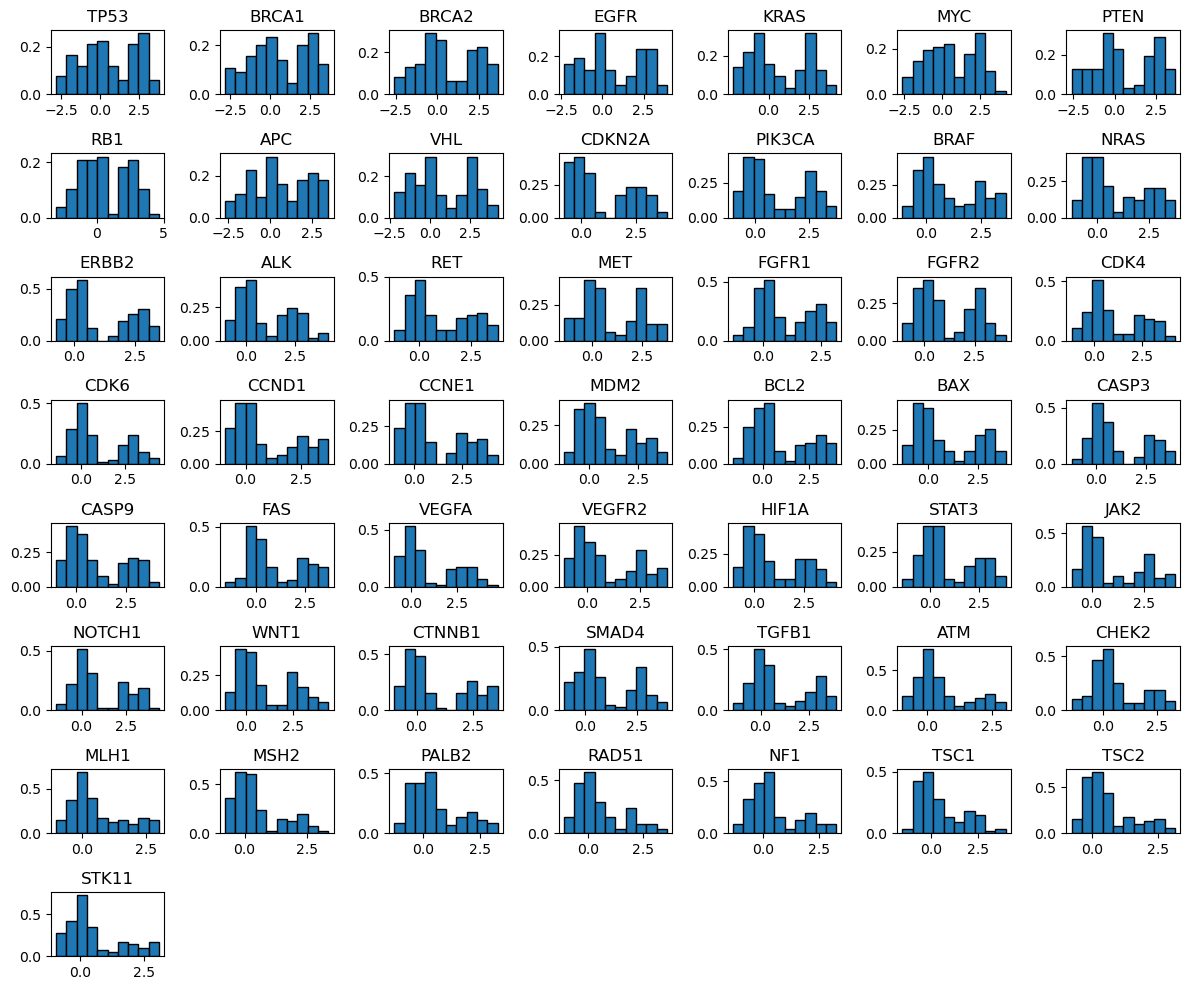

In [133]:
X.hist(edgecolor = "black", figsize=(12, 10), grid = False, density = True)
plt.tight_layout()
plt.show()

Se observa una distribución aproximadamente bimodal para todas las variables. Además, podemos detectar valores anómalos observando los diagramas de cajas y bigotes:

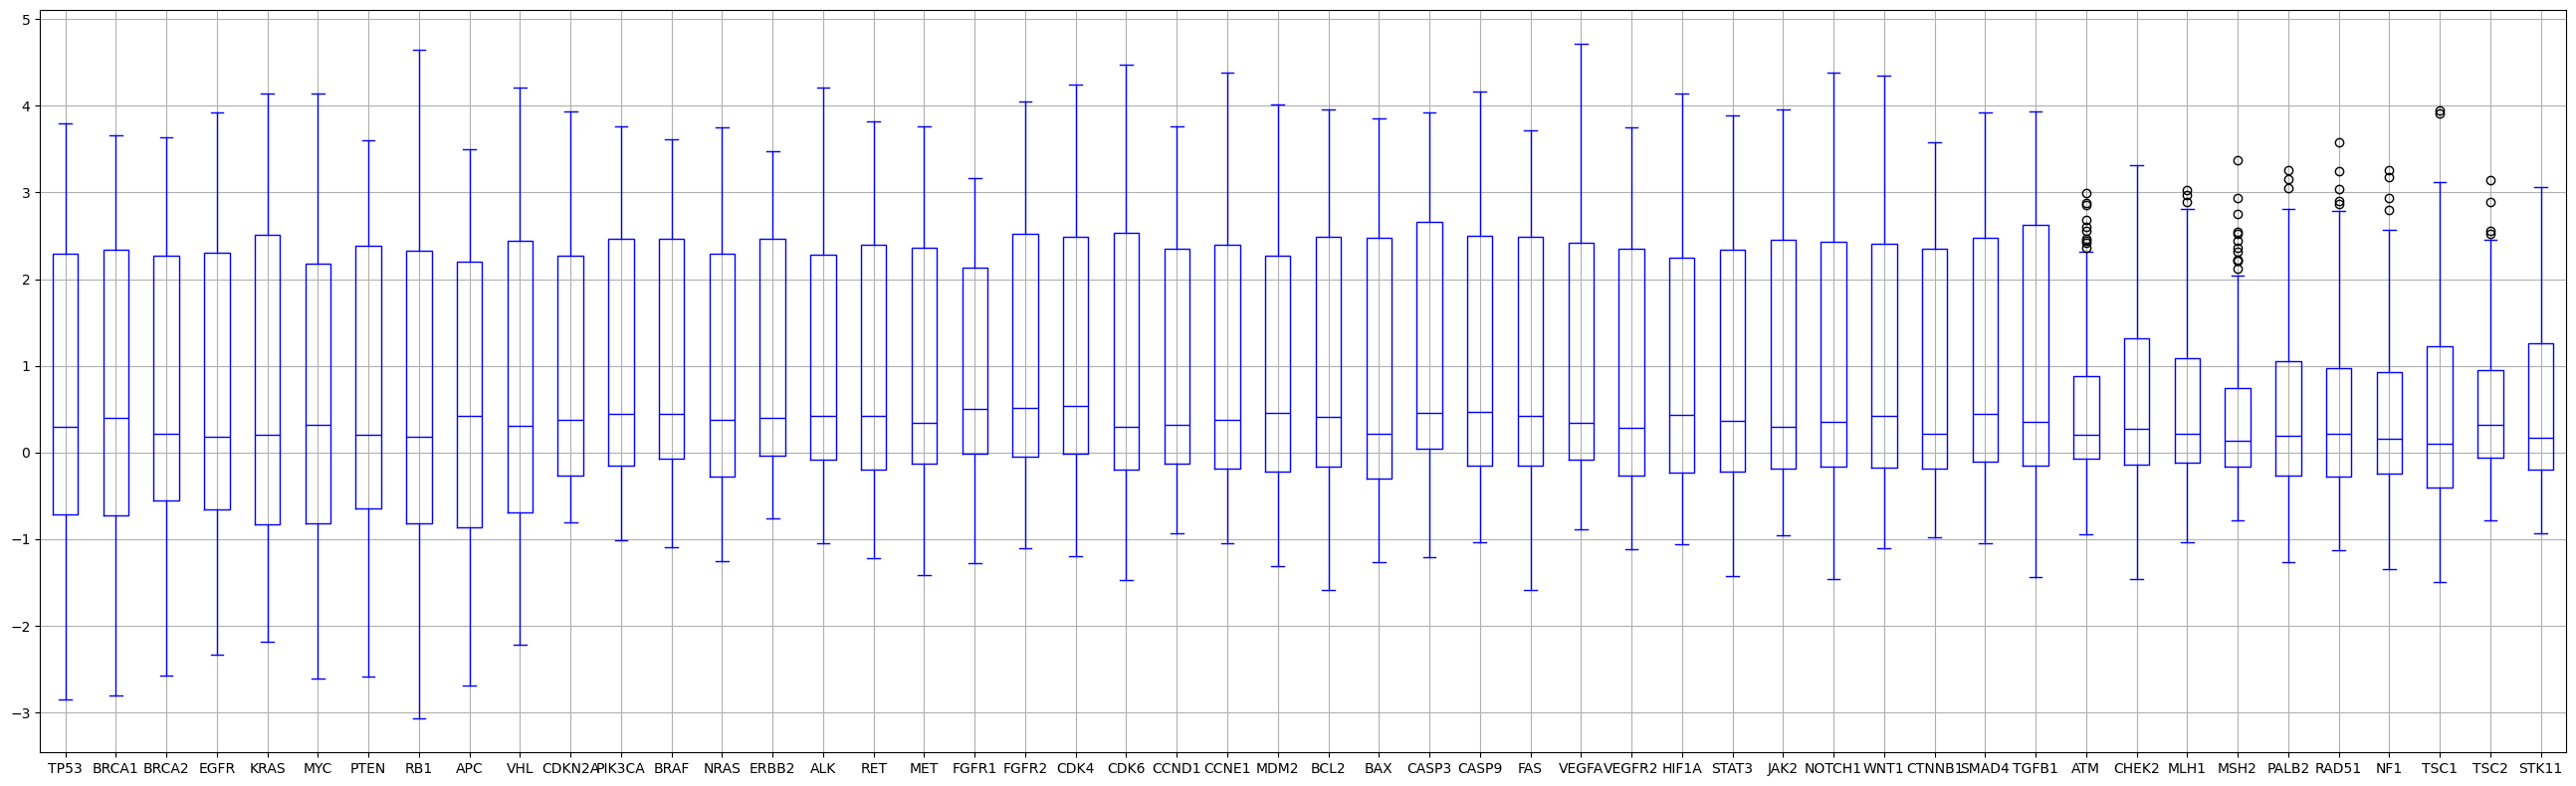

In [134]:
X.boxplot(color = "blue", figsize = (26, 8))
plt.tight_layout()
plt.show()

A partir de estos gráficos podemos concluir que la distribución de los datos es muy similar en todas las variables. Las distribuciones son bastante homogéneas, excepto para las últimas variables, cuyo rango es más estrecho. Además, contienen algunos valores anómalos. Por ello, será necesario escalar los datos utilizando un estimador que sea robusto frente a la presencia de valores anómalos.

## Multicolinealidad

Para comprobar si hay variables colineales entre sí, podemos obtener la matriz de correlaciones, que calcula los coeficientes de correlación para cada par de variables posible, y representarla visualmente con un mapa de calor:

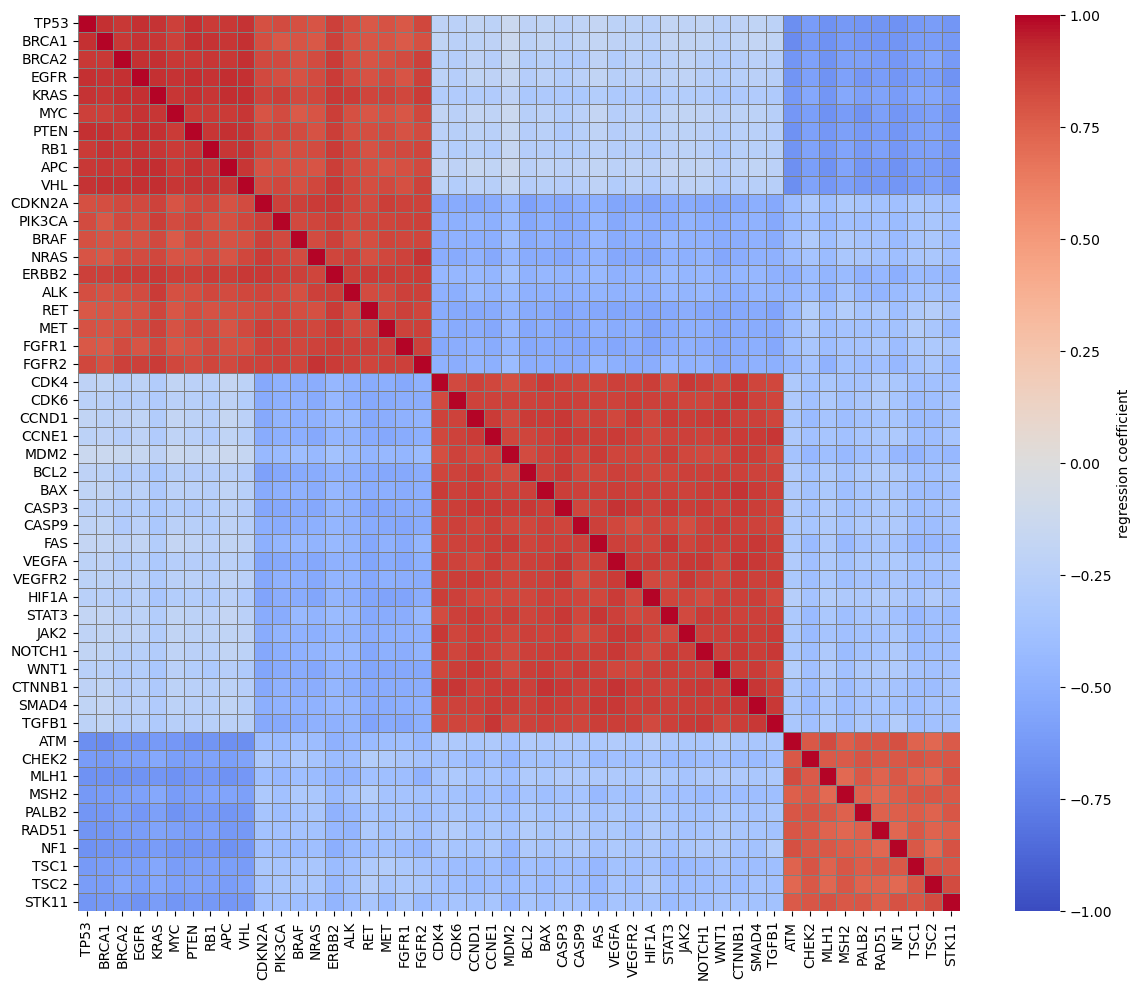

In [135]:
corr_matrix = X.corr() # matriz de correlación

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            cmap = 'coolwarm',
            linewidths = 0.5,
            linecolor = 'grey',
            center=  0, 
            vmin = -1,
            vmax = 1,
            annot = False,
            xticklabels = True,
            cbar_kws={'label': 'regression coefficient'})
plt.tight_layout()
plt.show()

Atendiendo a este mapa de calor, podemos observar que los genes no son completamente independientes entre ellos: existe una fuerte correlación positiva para la expresión de muchos de ellos (color rojo) y una correlación negativa menos intensa para otros (color azul intenso).

Por tanto, a la hora de implementar el algoritmo de agrupación, puede ser interesante no tener en cuenta estas variables, ya que, al ser colineales entre sí, realmente no aportan información.

# CLUSTERING

Vamos a implementar el algoritmo de clustering de dos maneras diferentes, para comparar dos procedimientos. Por un lado, vamos a hacerlo con un conjunto de características reducidas. Para ver de qué variable prescindimos, tendremos en cuenta un criterio relacionado con la colinealidad. Por otro lado, trabajaremos con el conjunto de datos original, sin prescindir de ninguna variable. Al final, compararemos los resultados obtenidos mediante los dos métodos.

## Dimensionalidad reducida

Para decidir cuanta colinealidad muestra una variable con respecto al resto, vamos a tener en cuenta el factor de inflación de la varianza (**VIF**). Consideraremos que la multicolinealidad es significativa en aquellas variables con $VIF \geq 10$, lo cual suele ser habitual, así que eliminaremos esas variables antes de implementar el modelo.

In [136]:
# Añadimos constante para el cálculo de VIF
X_vif = add_constant(X)

# Creamos un DataFrame para guardar los resultados
vif_data = pd.DataFrame()
vif_data["Gen"] = X_vif.columns # la primera columna contiene los nombres de los genes

# Calculamos VIF para cada columna
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Filtramos y ordenamos para ver qué variables tienen mayor multicolinealidad
vif_multicol = vif_data[vif_data["VIF"] > 10]
genes_multicol = vif_multicol["Gen"].tolist()
print("Genes con alta multicolinealidad (VIF > 10):\n")
for gen in genes_multicol:
    if gen != 'const':
        print(gen)

Genes con alta multicolinealidad (VIF > 10):

TP53
BRCA1
BRCA2
EGFR
KRAS
MYC
PTEN
RB1
APC
VHL
CDKN2A
PIK3CA
NRAS
ERBB2
ALK
RET
MET
FGFR1
FGFR2
CDK4
CDK6
CCND1
CCNE1
MDM2
BAX
CASP3
CASP9
FAS
VEGFA
VEGFR2
HIF1A
STAT3
JAK2
NOTCH1
WNT1
CTNNB1
SMAD4
TGFB1
STK11


Por tanto, como la información que aportan estos genes es redundante, podemos prescindir de ellos. De esta manera, se reduce la dimensionalidad de los datos de 50 variables a tan solo 10:

In [137]:
# Eliminamos las variables con alta multicolinealidad
genes_multicol.remove('const')
X_reducido = X.drop(columns = genes_multicol)
X_reducido.head()

,BRAF,BCL2,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2
0,2.623616,0.055461,0.369233,0.085684,-0.057824,-0.150552,-0.739261,-0.359922,-0.230319,0.528561,0.171809
1,2.166133,0.410951,0.048539,0.484322,-0.351027,-0.163831,-0.196054,-0.731757,0.148060,0.130528,0.002557
2,2.632613,1.095228,0.113730,0.653571,-0.803742,0.092317,0.129941,0.390911,-0.618475,-0.660228,0.260971
3,3.262156,0.413592,-0.223257,0.428199,0.107047,-0.622869,0.086590,0.192659,-0.441929,0.076863,0.029104
4,2.559413,0.544475,-0.396260,-0.057368,0.252494,0.432878,-0.600148,-0.167251,-0.237473,-0.326665,0.882727


Una vez reducida la dimensionalidad de los datos atendiendo al criterio del *VIF*, vamos a construir el modelo para agrupar según características. En primer lugar, escalamos los datos:

In [138]:
scaler = RobustScaler() # inicializamos el escalador robusto
X_scaled = scaler.fit_transform(X_reducido) # escalamos los datos

Con los datos escalados adecuadamente (todos tienen media $\mu = 0$ y desviación estándar $\sigma = 1$), podemos trabajar los algoritmos necesarios para hacer aprendizaje no supervisado.
Para estudiar si es mejor agrupar los datos en dos o tres clusters y estudiar el nivel de expresión génica correspondiente, necesitamos implementar un algoritmo de agrupamiento como `kmeans` y estudiar la inercia en función del número de clusters.

c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is k

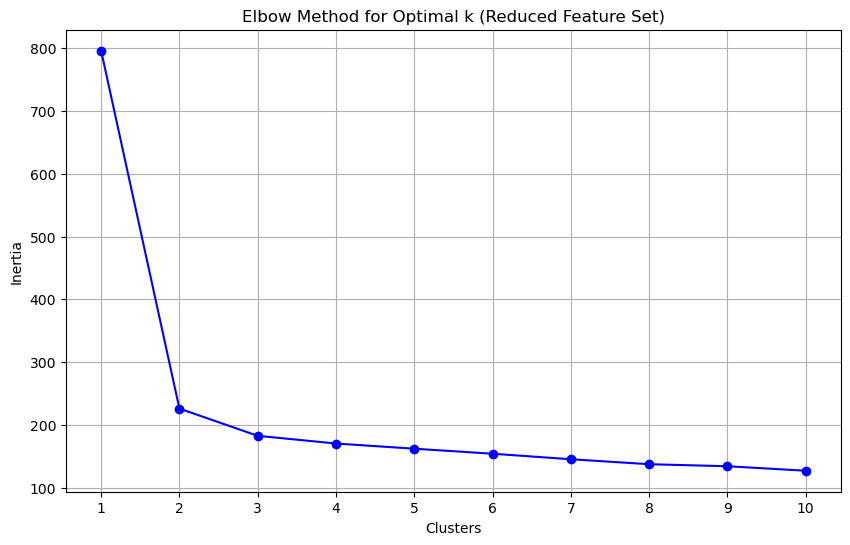

In [139]:
n_clusters_range = range(1, 11) # valores de k para evaluar
inertia_values = [] # inicailiza una lista para guardar los valores de inercia correspondientes a cada valor de k

for k in n_clusters_range:
    kmeans = KMeans(n_clusters = k, n_init = 10) # inicializa el algoritmo
    kmeans.fit(X_scaled) # ajusta los datos al modelo
    inertia_values.append(kmeans.inertia_) # guarda el valor de inercia obtenido para el valor de k actual en la lista

# representación gráfica del codo
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertia_values, marker = 'o', linestyle = '-', color = 'b')
plt.title('Elbow Method for Optimal k (Reduced Feature Set)')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

El número óptimo de clusters es 2. Por tanto, construimos el modelo teniendo esto en cuenta. Además, podemos obtener un nuevo dataframe con el nivel de expresión de cada gen para el centroide de cada cluster:

In [140]:
kmeans = KMeans(n_clusters = 2, n_init = 10).fit(X_scaled) # ajustar el modelo para 2 clusters
centroids = kmeans.cluster_centers_ # niveles de expresión de los genes para los centroides de cada cluster

centroids_gene_expression = pd.DataFrame(centroids, columns = X_reducido.columns)
centroids_gene_expression.index.name = 'Cluster'
centroids_gene_expression

c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,BRAF,BCL2,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2
Cluster,,,,,,,,,,,
0,0.370262,0.340595,-0.180521,-0.163195,-0.140806,-0.167239,-0.169845,-0.180825,-0.197124,-0.126477,-0.191506
1,-0.159641,-0.159374,1.994141,1.415808,1.618562,2.029416,1.512262,1.530113,1.681573,1.319173,1.633983


Ahora que tenemos los niveles de expresión de cada gen relevante para los centroides correspondientes a cada cluster, podemos obtener un nuevo mapa de calor para comprobar si realmente hay una diferencia significativa entre los clusters en cuanto al nivel de expresión de diferentes genes.

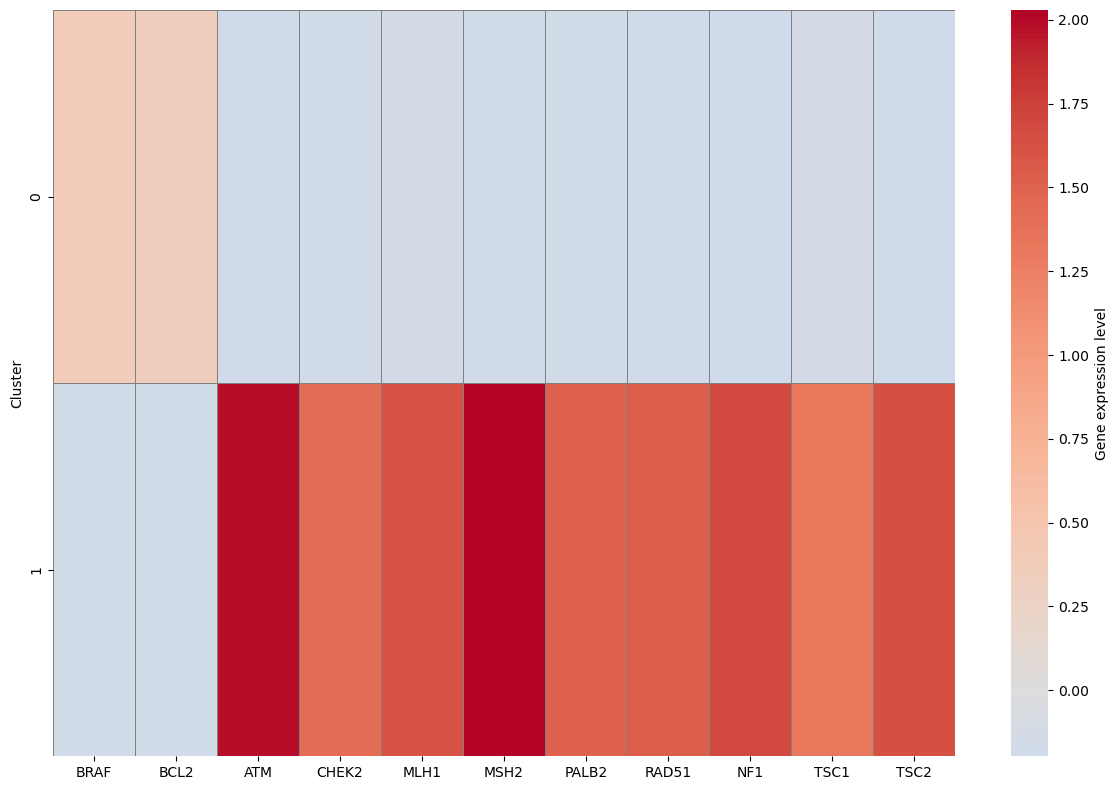

In [141]:
plt.figure(figsize=(12, 8))
sns.heatmap(centroids_gene_expression, 
            cmap = 'coolwarm',
            center = 0,
            vmin = centroids.min(),
            vmax = centroids.max(),
            linewidths = 0.5,
            linecolor = 'grey',
            annot = False,
            xticklabels = True,
            cbar_kws={'label': 'Gene expression level'})
plt.tight_layout()
plt.show()

Efectivamente, podemos identificar dos clusters claramente diferentes: uno en el que el nivel de expresión de los genes **BRAF** y **BCL2** es ligeramente superior, mientras que el nivel de expresión de los demás genes es ínfimo; y otro en el que sucede lo contrario: el nivel de expresión de estos dos genes es nulo, pero el de los demás genes es significativo.

## Dimensionalidad original

Hemos visto que, al eliminar las variables atendiendo al criterio $VIF \geq 10$, obtenemos dos clusters cuya expresión génica difiere significativamente en los genes conservados. Sin embargo, podemos plantearnos: ¿qué ocurriría si no aplicásemos este criterio para simplificar los datos y trabajamos con los 50 genes? ¿Se vería modificado el resultado? Esto puede ser útil para evaluar la conveniencia del criterio $VIF$. 

En primer lugar, escalamos los datos originales:

In [142]:
X_scaled_full = scaler.fit_transform(X)

Visualizamos de nuevo la inercia en función del número de *clusters*:

c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is k

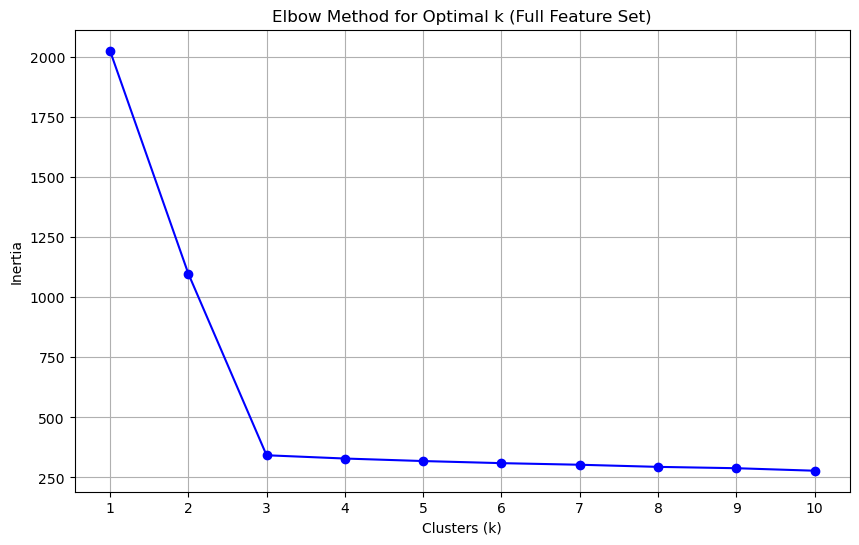

In [143]:
n_clusters_range = range(1, 11) # valores de k para evaluar
inertia_values = [] # inicailiza una lista para guardar los valores de inercia correspondientes a cada valor de k

for k in n_clusters_range:
    kmeans = KMeans(n_clusters = k, n_init = 10) # inicializa el algoritmo
    kmeans.fit(X_scaled_full) # ajusta los datos al modelo
    inertia_values.append(kmeans.inertia_) # guarda el valor de inercia obtenido para el valor de k actual en la lista

plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertia_values, marker = 'o', linestyle = '-', color = 'b')
plt.title('Elbow Method for Optimal k (Full Feature Set)')
plt.xlabel('Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

En este caso, el número óptimo de clusters es 3, uno más que en el caso anterior. Siguiendo el mismo esquema de trabajo, podemos extraer los datos de expresión génica para cada uno de los centroides:

In [144]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(X_scaled_full) # ajustar el modelo para 3 clusters
centroids = kmeans.cluster_centers_ # niveles de expresión de los genes para los centroides de cada cluster

centroids_gene_expression = pd.DataFrame(centroids, columns = X.columns)
centroids_gene_expression.index.name = 'Cluster'
centroids_gene_expression.head()

c:\Users\migog\miniconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,TP53,BRCA1,BRCA2,EGFR,KRAS,MYC,PTEN,RB1,APC,VHL,...,ATM,CHEK2,MLH1,MSH2,PALB2,RAD51,NF1,TSC1,TSC2,STK11
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.717608,0.684239,0.793433,0.801686,0.727800,0.684281,0.765072,0.790219,0.648556,0.773870,...,-0.236287,-0.119652,-0.181469,-0.113653,-0.176508,-0.196980,-0.224538,-0.087468,-0.138310,-0.117341
1,-0.095530,-0.109827,-0.075484,-0.049513,-0.104354,-0.090321,-0.088162,-0.075441,-0.112529,-0.071141,...,-0.116787,-0.212959,-0.094335,-0.228480,-0.162230,-0.162362,-0.165793,-0.171059,-0.252300,-0.139167
2,-0.654412,-0.656657,-0.556695,-0.575991,-0.480695,-0.583189,-0.587141,-0.553593,-0.634496,-0.547542,...,1.994141,1.415808,1.618562,2.029416,1.512262,1.530113,1.681573,1.319173,1.633983,1.425951


Y, de nuevo, podemos visualizar las diferencias en la expresión génica entre los grupos utilizando un mapa de calor:

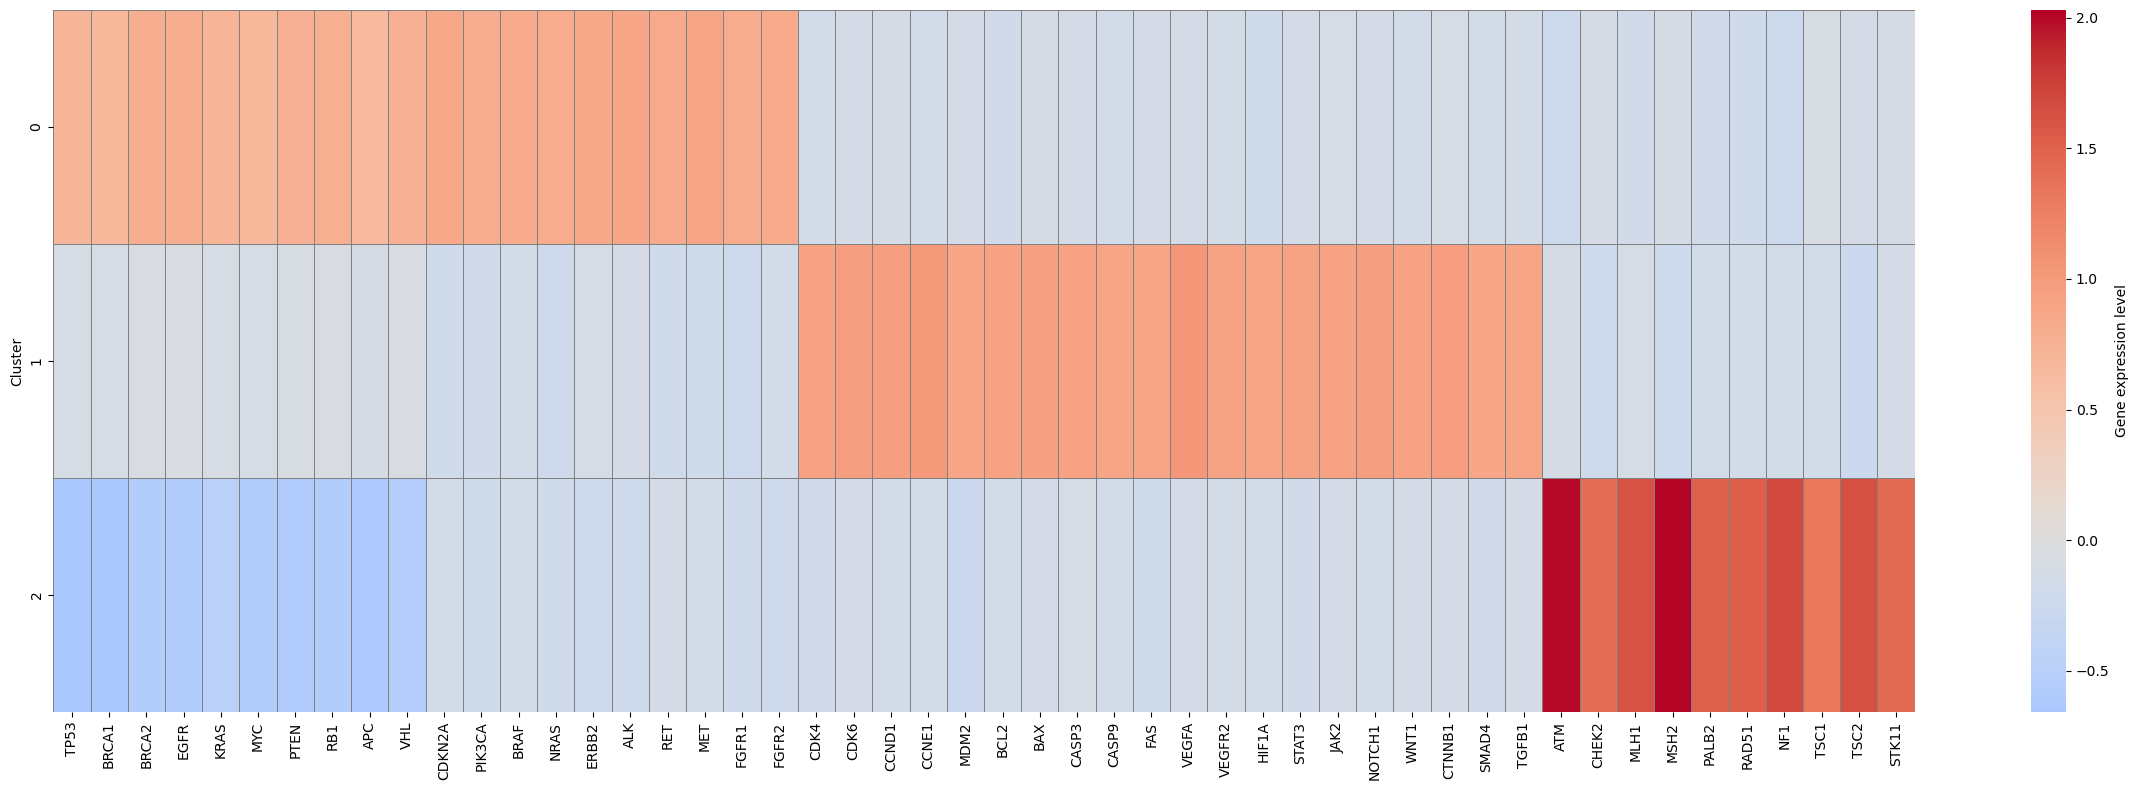

In [145]:
plt.figure(figsize = (24, 8))
sns.heatmap(centroids_gene_expression, 
            cmap = 'coolwarm',
            center = 0,
            vmin = centroids.min(),
            vmax = centroids.max(),
            linewidths = 0.5,
            linecolor = 'grey', 
            annot = False,
            xticklabels = True,
            cbar_kws={'label': 'Gene expression level'})
plt.tight_layout()
plt.show()

Podemos apreciar las diferencias significativas entre los tres clusters: cada uno muestra una mayor expresión en diferentes genes, como se puede ver en las zonas más rojas. En uno de ellos, también se puede apreciar una menor expresión en otro conjunto de genes, como se ve en la zona azul ligeramente oscurecida.

# CONCLUSIÓN

En primer lugar, hemos conseguido **agrupar a los pacientes** en tres colonias diferentes, definiendo así **tres perfiles genómicos distintos** atendiendo a la expresión de un conjunto particular de genes en cada uno de ellos.

En segundo lugar, hemos visto que **NO es posible eliminar variables** para agrupar a los pacientes atendindo al criterio dado $\left(VIF \geq 10 \right)$, ya que se pierde demasiada información. No obstante, sería interesante ampliar la investigación en esta línea: ¿a partir de qué valor límite de VIF deja de perderse información, de manera que la dimensionalidad de los datos pueda reducirse respetando su estructura original?